In [5]:
import numpy as np
import torch
import os
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from unet_model import UNet

In [2]:
net = torch.load('model-L1-10.pth')
print(net)

DataParallel(
  (module): UNet(
    (inc): DoubleConv(
      (double_conv): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (down1): Down(
      (maxpool_conv): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): DoubleConv(
          (double_conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), p

In [125]:
torch.save(net.module.state_dict(), 'model-L1-10a.pth')

In [2]:
net = UNet(n_channels=3, bilinear=True)
net.load_state_dict(torch.load('model-L1-10a.pth'))

<All keys matched successfully>

In [3]:
net

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, moment

In [9]:
net.eval()
#net.to(torch.device('cuda'))
for i in tqdm(range(len(os.listdir('test_inter')))):
    test_image = Image.open(f"test_inter/{i}.bmp")
    test_image_array = np.array(test_image)
    test_image_array = test_image_array/255
    tensor = torch.tensor(test_image_array)
    #tensor.to(torch.device('cuda'))
#     print(tensor[0])
    tensor = tensor.permute(2,0,1)
#     print(tensor.shape)
    tensor = torch.unsqueeze(tensor, 0)
#     print(tensor.shape)
    tensor = tensor.type(torch.FloatTensor)
    # print(net.type)
    out = net(tensor)
    out = out*255
    out.clip_(0, 255)
    out_np = np.array(out.detach()).astype(np.uint8)
    out_np = np.squeeze(out_np)
    out_np = np.transpose(out_np, (1,2,0))
    im = Image.fromarray(out_np)
    im.save(f"test-output/{i}.bmp")

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [1:59:39<00:00,  6.69s/it]


In [5]:
out = out*255

In [6]:
out.clip_(0, 255)

tensor([[[[124.9620, 119.8567, 125.8189,  ...,  97.5001,  94.7847, 111.2577],
          [132.5611, 141.6628, 145.6729,  ..., 116.7805, 117.2887, 111.9860],
          [131.3739, 142.7126, 145.5583,  ..., 120.0218, 120.6022, 117.1564],
          ...,
          [191.3897, 193.9277, 197.2620,  ..., 145.5567, 133.6436, 129.2735],
          [176.1844, 189.8804, 194.7065,  ..., 119.4611, 113.7252, 114.7527],
          [171.3728, 181.5554, 192.2045,  ..., 117.9344, 115.5638, 112.7474]],

         [[ 98.6480,  95.2892, 100.9049,  ..., 104.8897, 100.1863,  99.4093],
          [102.8193,  98.0777,  97.8449,  ..., 111.8375, 112.1184, 106.8231],
          [103.7540,  96.7419,  94.6469,  ..., 115.2971, 118.3300, 111.9595],
          ...,
          [171.8425, 174.5056, 177.9336,  ..., 115.9577, 105.7940, 107.6489],
          [153.9247, 163.4991, 169.8427,  ...,  91.4987,  87.4123,  91.6106],
          [131.4515, 151.3849, 161.7593,  ...,  90.4147,  89.0422,  88.5859]],

         [[ 90.1201,  80.3224,

In [7]:
out_np = np.array(out.detach()).astype(np.uint8)

In [8]:
print(out_np.shape)

(1, 3, 1356, 2040)


In [9]:
out_np = np.squeeze(out_np)

In [10]:
out_np = np.transpose(out_np, (1,2,0))

In [11]:
print(out_np.shape)

(1356, 2040, 3)


In [12]:
print(out_np)

[[[124  98  90]
  [119  95  80]
  [125 100  81]
  ...
  [ 97 104  75]
  [ 94 100  75]
  [111  99  75]]

 [[132 102  89]
  [141  98  73]
  [145  97  74]
  ...
  [116 111  74]
  [117 112  76]
  [111 106  76]]

 [[131 103  82]
  [142  96  66]
  [145  94  65]
  ...
  [120 115  77]
  [120 118  80]
  [117 111  85]]

 ...

 [[191 171 171]
  [193 174 178]
  [197 177 182]
  ...
  [145 115  97]
  [133 105  84]
  [129 107  87]]

 [[176 153 153]
  [189 163 158]
  [194 169 168]
  ...
  [119  91  65]
  [113  87  65]
  [114  91  75]]

 [[171 131 127]
  [181 151 138]
  [192 161 149]
  ...
  [117  90  67]
  [115  89  65]
  [112  88  85]]]


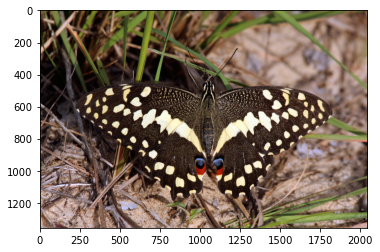

In [13]:
plt.imshow(out_np)

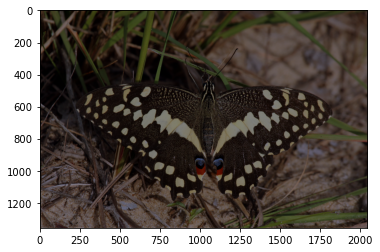

In [14]:
plt.imshow(test_image_array)

In [15]:
im = Image.fromarray(out_np)
im.save("L1_2.bmp")